In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [2]:
data = pd.read_csv('../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')

**Quick View of our dataset:**

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


We don't have any missing values in our dataset. If any feature would had any missing values. We would have used imputation techniques to imporve the quality of our dataset.

**Short Statistical Summary of our dataset:**

In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


We will use this dataset to distinguish the wine as good or not so good. We would you classification algorithm to classify the wine in two classes.

We will create a new Feature Outcome to distinguish the "Good" and "Not so Good" wines. We need to fit numeric values to classify the data, hence we would use 1 for "Good" and 0 for "Not so Good" wines in the new feature.

In [6]:
data.loc[data['quality'] <= 6.5, 'Outcome'] = 0
data.loc[data['quality'] > 6.5, 'Outcome'] = 1

In [7]:
data['Outcome']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1594    0.0
1595    0.0
1596    0.0
1597    0.0
1598    0.0
Name: Outcome, Length: 1599, dtype: float64

In [8]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Outcome
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.0


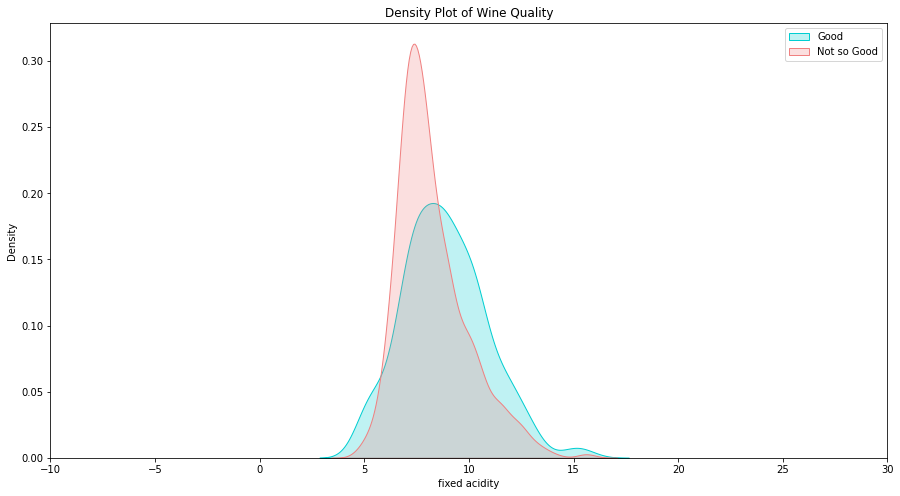

In [9]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(data["fixed acidity"][data.Outcome == 1], color="darkturquoise", shade=True)
sns.kdeplot(data["fixed acidity"][data.Outcome == 0], color="lightcoral", shade=True)
plt.legend(['Good', 'Not so Good'])
plt.title('Density Plot of Wine Quality')
ax.set(xlabel='fixed acidity')
plt.xlim(-10,30)
plt.show()

The Good wines are slighly more acidic.The propable reason might be because high acidity helps to acts as a buffer for aging a wine.(shorturl.at/aknD4)

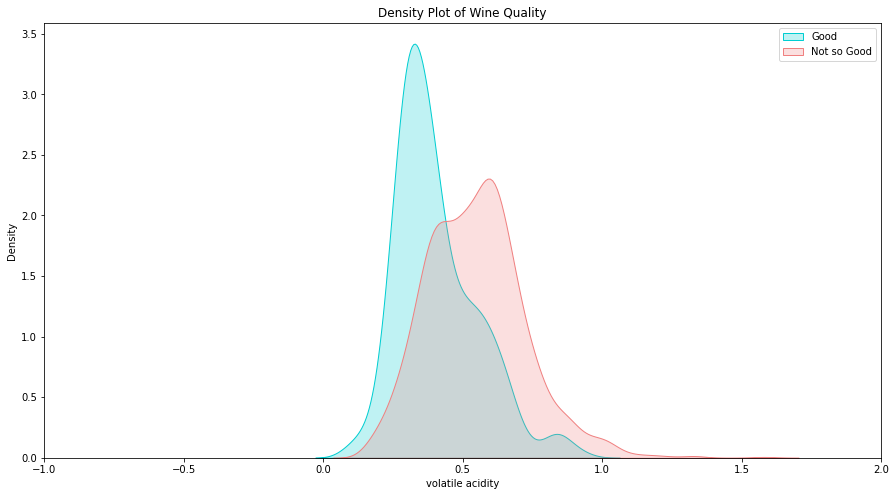

In [10]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(data["volatile acidity"][data.Outcome == 1], color="darkturquoise", shade=True)
sns.kdeplot(data["volatile acidity"][data.Outcome == 0], color="lightcoral", shade=True)
plt.legend(['Good', 'Not so Good'])
plt.title('Density Plot of Wine Quality')
ax.set(xlabel='volatile acidity')
plt.xlim(-1,2)
plt.show()

We observed that the lesser the Volatile acidity the better the wine. The Volatile acidity is maily caused by bacteria during Fermantation process. Volatile Acidity affects the taste and aroma of the wine. May be that's why Wine lovers prefer wine with less Volatile acidity.(shorturl.at/eAIQV)

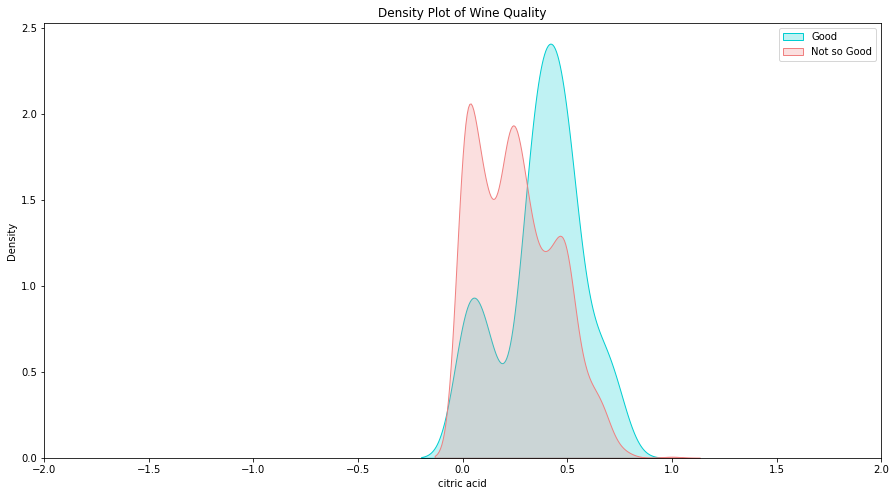

In [11]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(data["citric acid"][data.Outcome == 1], color="darkturquoise", shade=True)
sns.kdeplot(data["citric acid"][data.Outcome == 0], color="lightcoral", shade=True)
plt.legend(['Good', 'Not so Good'])
plt.title('Density Plot of Wine Quality')
ax.set(xlabel='citric acid')
plt.xlim(-2,2)
plt.show()

Citric acid is often added to wines to increase acidity, complement a specific flavor or prevent ferric hazes. It can be added to finished wines to increase acidity and give a “fresh” flavor

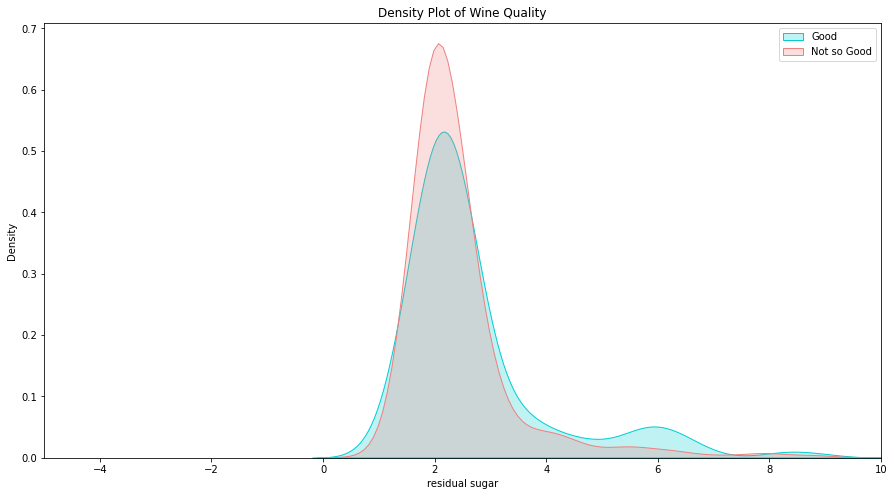

In [12]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(data["residual sugar"][data.Outcome == 1], color="darkturquoise", shade=True)
sns.kdeplot(data["residual sugar"][data.Outcome == 0], color="lightcoral", shade=True)
plt.legend(['Good', 'Not so Good'])
plt.title('Density Plot of Wine Quality')
ax.set(xlabel='residual sugar')
plt.xlim(-5,10)
plt.show()

Residual Sugar is not a good mark for tasting our wine

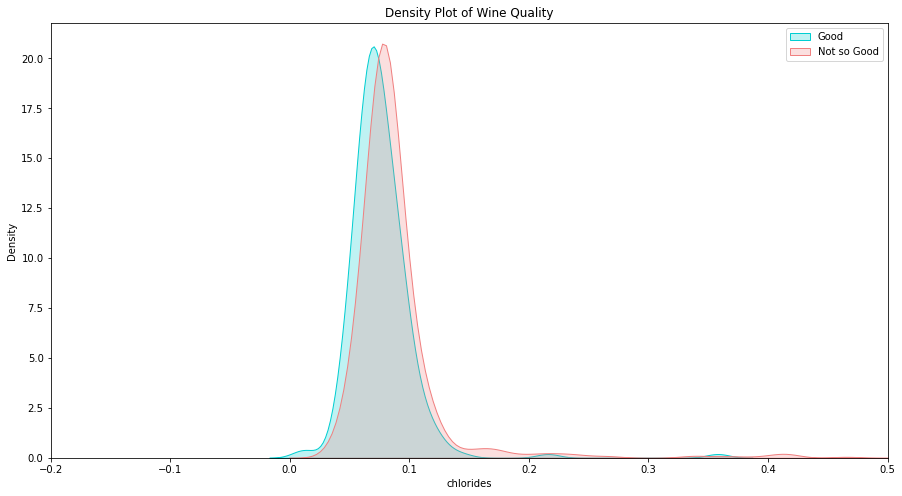

In [13]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(data["chlorides"][data.Outcome == 1], color="darkturquoise", shade=True)
sns.kdeplot(data["chlorides"][data.Outcome == 0], color="lightcoral", shade=True)
plt.legend(['Good', 'Not so Good'])
plt.title('Density Plot of Wine Quality')
ax.set(xlabel='chlorides')
plt.xlim(-0.2,0.5)
plt.show()

The Chlorides gives salty flavour to the wine. If the concentration is high it turns away the consumer. Moreover, The wine with higher Chlorides and Sodium concentration are not allowed in many contries.(shorturl.at/nDQV1) 

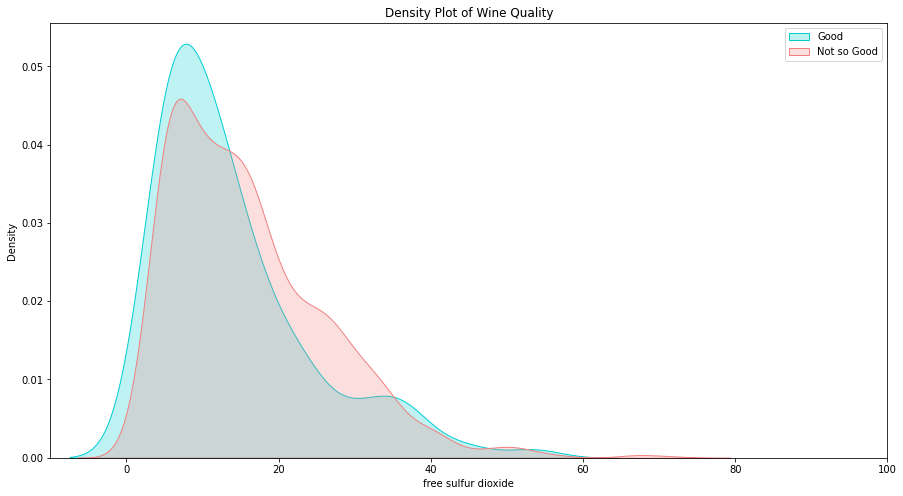

In [14]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(data["free sulfur dioxide"][data.Outcome == 1], color="darkturquoise", shade=True)
sns.kdeplot(data["free sulfur dioxide"][data.Outcome == 0], color="lightcoral", shade=True)
plt.legend(['Good', 'Not so Good'])
plt.title('Density Plot of Wine Quality')
ax.set(xlabel='free sulfur dioxide')
plt.xlim(-10,100)
plt.show()

Free Sulfur Dioxide acts as a buffer and protects the wine from unwanted microbial growth. We can observed that low amount should be present in better wine quality.High Amount of Free Sulfur dioxide can change the fruity aroma of the wine which can be turn down for consumers.(shorturl.at/kGST0)

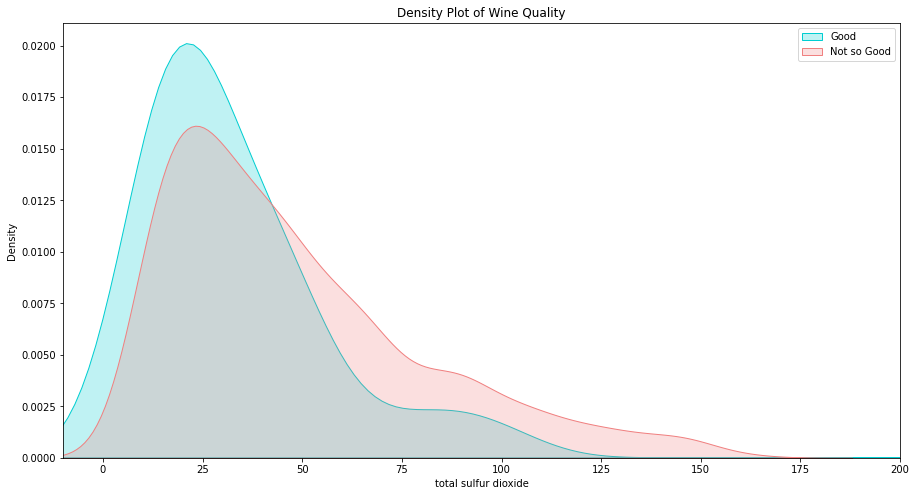

In [15]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(data["total sulfur dioxide"][data.Outcome == 1], color="darkturquoise", shade=True)
sns.kdeplot(data["total sulfur dioxide"][data.Outcome == 0], color="lightcoral", shade=True)
plt.legend(['Good', 'Not so Good'])
plt.title('Density Plot of Wine Quality')
ax.set(xlabel='total sulfur dioxide')
plt.xlim(-10,200)
plt.show()

The total Sulfur dioxide is sum of Free Sulfur dioxide and amount of sulfur which is bound to other chemicals. Higher concentrations can sharply change the flavour to bitter/metallic/chemical flavor.(shorturl.at/puR25)

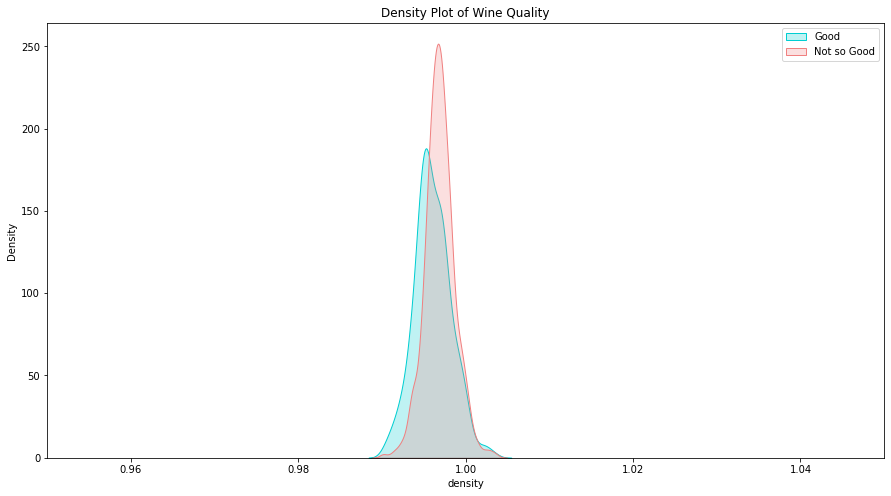

In [16]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(data["density"][data.Outcome == 1], color="darkturquoise", shade=True)
sns.kdeplot(data["density"][data.Outcome == 0], color="lightcoral", shade=True)
plt.legend(['Good', 'Not so Good'])
plt.title('Density Plot of Wine Quality')
ax.set(xlabel='density')
plt.xlim(0.95,1.05)
plt.show()

Wine has higher density than water. Wine with a medium density gives a better texture and sensation. Higher density can also turn away a lot of consumers.

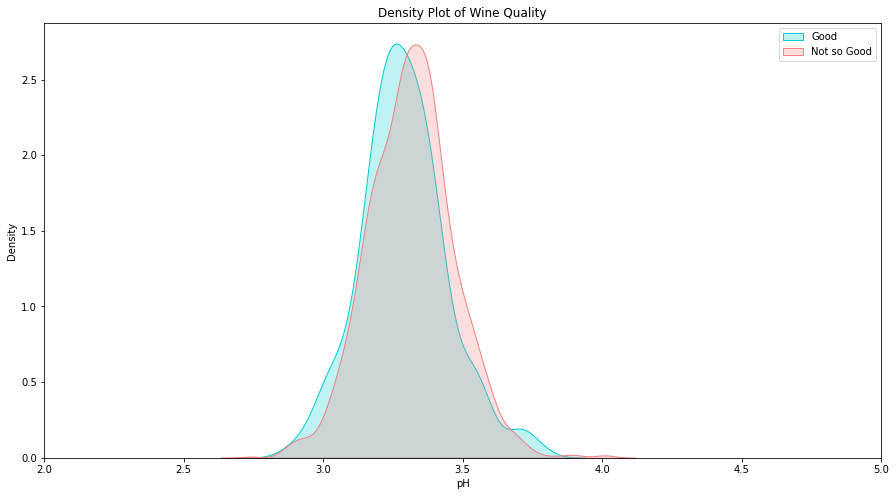

In [17]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(data["pH"][data.Outcome == 1], color="darkturquoise", shade=True)
sns.kdeplot(data["pH"][data.Outcome == 0], color="lightcoral", shade=True)
plt.legend(['Good', 'Not so Good'])
plt.title('Density Plot of Wine Quality')
ax.set(xlabel='pH')
plt.xlim(2,5)
plt.show()

pH values are mostly between 3 to 4 for both the wines.

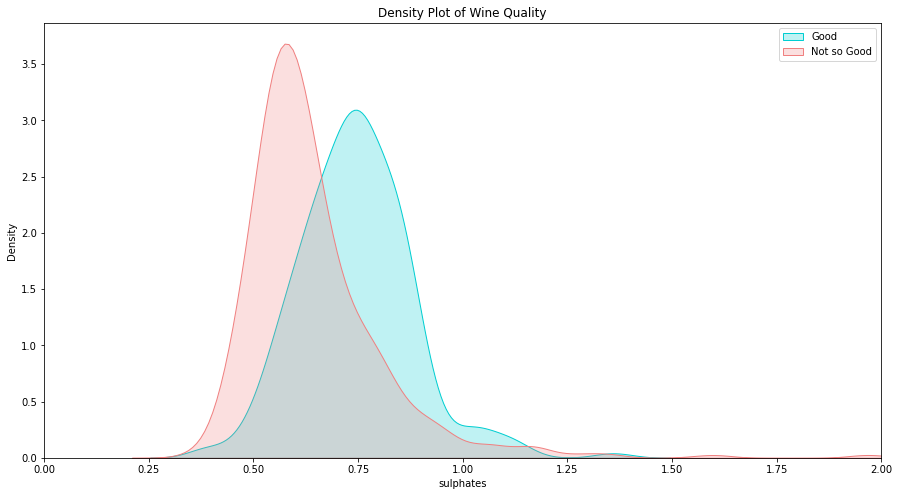

In [18]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(data["sulphates"][data.Outcome == 1], color="darkturquoise", shade=True)
sns.kdeplot(data["sulphates"][data.Outcome == 0], color="lightcoral", shade=True)
plt.legend(['Good', 'Not so Good'])
plt.title('Density Plot of Wine Quality')
ax.set(xlabel='sulphates')
plt.xlim(0,2)
plt.show()

Slighly higher concentration of sulphates is good for wine quality

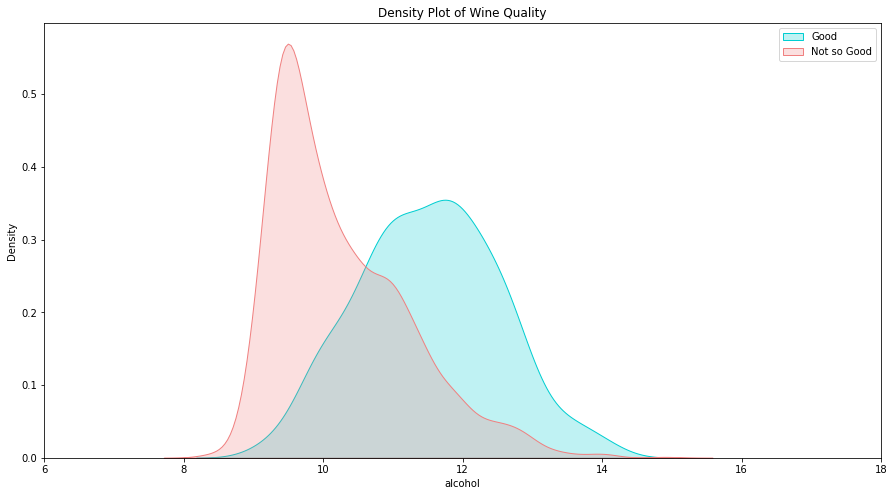

In [19]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(data["alcohol"][data.Outcome == 1], color="darkturquoise", shade=True)
sns.kdeplot(data["alcohol"][data.Outcome == 0], color="lightcoral", shade=True)
plt.legend(['Good', 'Not so Good'])
plt.title('Density Plot of Wine Quality')
ax.set(xlabel='alcohol')
plt.xlim(6,18)
plt.show()

Higher amount of alcohol is preferred amoung wine consumer.

We can also check correlation of the features with the target "Outcome" feature with corr() function.

<AxesSubplot:>

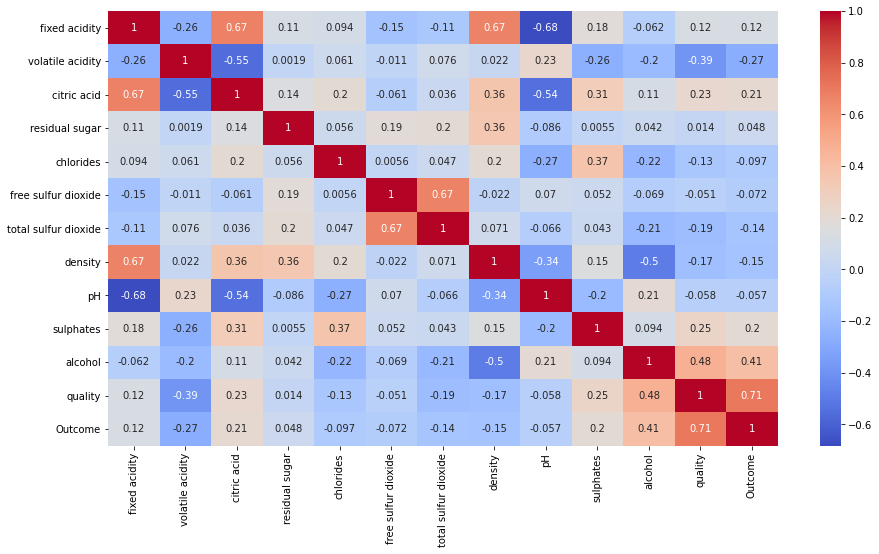

In [20]:
plt.figure(figsize=(15,8))
Corr = data.corr()
sns.heatmap(Corr, cmap="coolwarm", annot=True)

We can concur from heatmap our exploratory data analysis to be true. The parameters which improves the quality of wine like Fixed acitity,alchohol,Sulphites etc are showing positive correlation. The parameters which decreases the quality of wine like Volatile acidity, density etc are showig negative correlation.

We will drop the features which are showing very low correlation with the target.

In [21]:
final_data = data.drop(['pH','free sulfur dioxide'], axis=1)


Let's divide our dataset into training data "X" and the target feature Outcome "Y".

In [22]:
final_data_X = final_data.drop('Outcome', axis=1)
final_data_Y = final_data['Outcome']

To fit the data into our model and test it's accuracy, we will again divide our data into training data and test data. We will train the model with training data and test the accuracy with the test data. We will use predifined Scikit learn function train_test_split for dividing.

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_data_X, final_data_Y, test_size=0.4, random_state=2)

We will use Random Forest Classifier for our classification task. We can also use Decision tree and logistic regression for classification. We will import the RandomForestClassifier from sklearn library. We will fit the train data to model. We will use the predict function to predict the values of test data.

In [24]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 2)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training data
classifier.fit(X_train, y_train)
  
# performing predictions on the test dataset
y_pred = classifier.predict(X_test)

We will check the accuracy of our model. We will use the accuracy score function from sklearn library. 

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

We will use confusion matrix to cehck the performance of our model. Calculating a confusion matrix can give you a better idea of what your classification model is getting right and what types of errors it is making.

Reference : https://machinelearningmastery.com/confusion-matrix-machine-learning/

<AxesSubplot:>

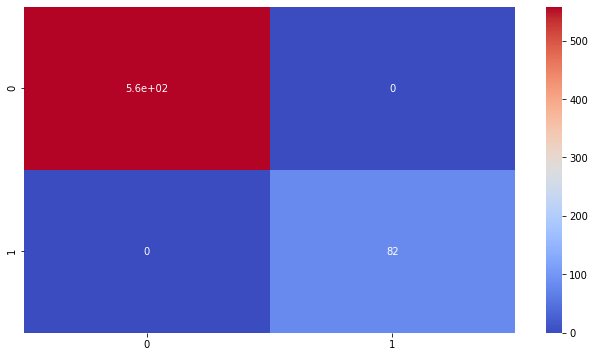

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(11,6))
sns.heatmap(cm, cmap="coolwarm", annot=True)

We can see from graph that only 6 times the value should have been 0 but model predicted to be 1, our model correctly predicted when value was 0 for all the test examples.